### The first file ###
**Notebook 1**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('train.csv')

In [21]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [22]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [23]:
# See number of unique objects of categorical variables
df.loc[:, df.dtypes=='object'].nunique()

Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64

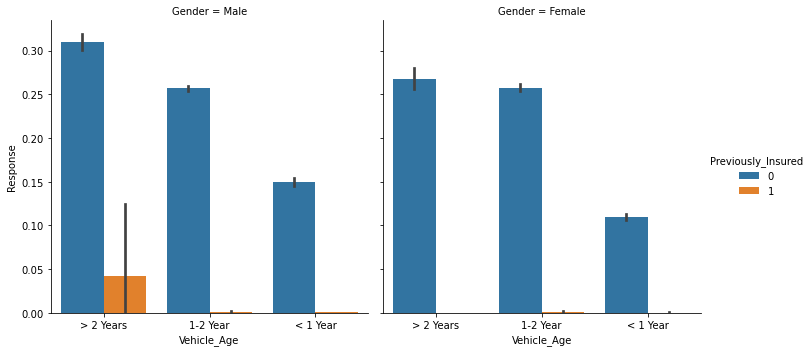

In [24]:
# Bar plot of response means, vs the gender, vehicle age and previously insured or not
# Skewed since the classes are highly imbalanced
# People will not switch insurances in the first 2 years, but may do so later
sb.catplot('Vehicle_Age', 'Response', kind='bar', hue='Previously_Insured', col='Gender', data=df)

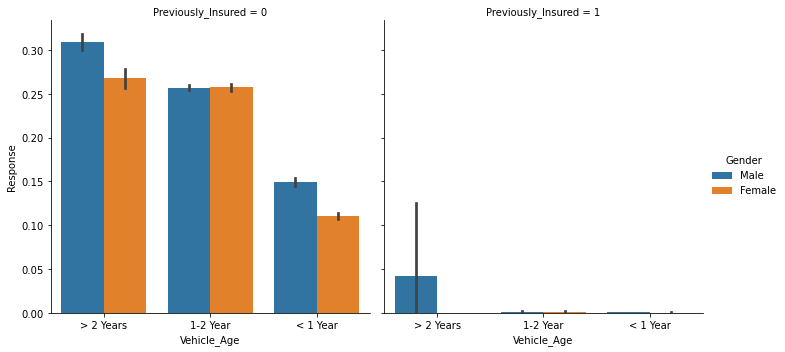

In [25]:
# Bar plot of response means, vs the gender, vehicle age and previously insured or not

sb.catplot('Vehicle_Age', 'Response', kind='bar', hue='Gender', col='Previously_Insured', data=df)

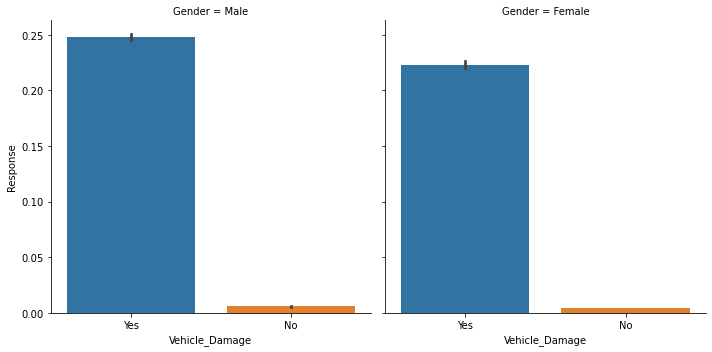

In [26]:
sb.catplot('Vehicle_Damage', 'Response', data=df, kind='bar', col='Gender')

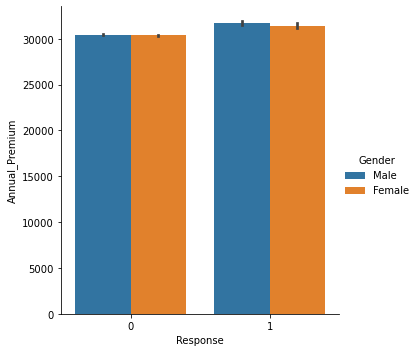

In [27]:
# Interesting. The people with a positive response have a higher premium.
# It could be that the car values are more for those who accepted
sb.catplot('Response', 'Annual_Premium', kind='bar', hue='Gender', data=df) 

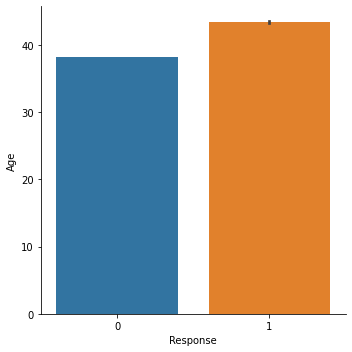

In [28]:
# Better response rate for older people
sb.catplot('Response','Age', kind='bar', data=df)

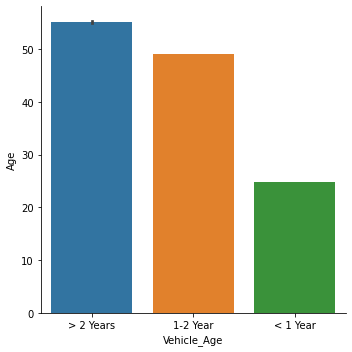

In [29]:
# The older the person, the older his car!. Guess it makes sense
sb.catplot('Vehicle_Age','Age', kind='bar', data=df)

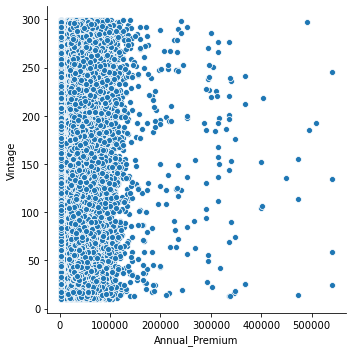

In [30]:
# No real correlation here
sb.relplot('Annual_Premium', 'Vintage', kind='scatter', data=df)

In [31]:
df.corr() # Don't have to worry about correlation much. Can do factor analysis easily

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [32]:
df['Response'].value_counts() # This needs to be fixed while modeling. Dataset is highly skewed

0    334399
1     46710
Name: Response, dtype: int64

In [33]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [34]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [35]:
df['Driving_License'].value_counts() # Really makes no sense in keeping this variable

1    380297
0       812
Name: Driving_License, dtype: int64

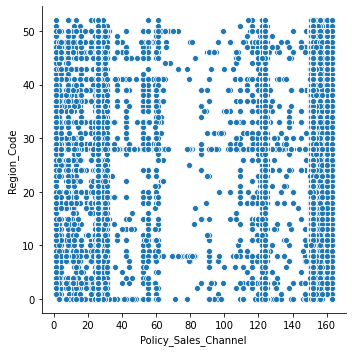

In [36]:
# Problem is that there is that a manual binning or even clustering won't work properly.
sb.relplot('Policy_Sales_Channel','Region_Code', kind='scatter', data=df)